In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

In [ ]:
def closest_centroids(x,centroids):
  n=x.shape[0]
  k=centroids.shape[0]
  dist=np.zeros(k)
  idx=[]
  for i in range(n):
    dist=[]
    for j in range(k):
      dist.append(np.linalg.norm(x[i]-centroids[j]))
    idx.append(np.argmin(dist))
  idx=np.array(idx)
  return idx




In [ ]:
X = np.load("ex7_X.npy")


In [ ]:
print("First five elements of X are:\n", X[:5])
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [ ]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print(" elements in idx are:", idx)

 elements in idx are: [0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 0]


In [ ]:
def calc_centroids(x,idx,k):
  n=x.shape[1]
  centroids=np.zeros((k,n))
  for i in range(k):
    centroids[i]=np.mean(x[idx==i],axis=0)
  return centroids


In [ ]:
K = 3
centroids = calc_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [ ]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = closest_centroids(X, centroids)

        # Optionally plot progress
        '''if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            plt.show()'''

        # Given the memberships, compute new centroids
        centroids = calc_centroids(X, idx, K)
    '''plt.show()'''
    return centroids, idx

K-Means iteration 0/9


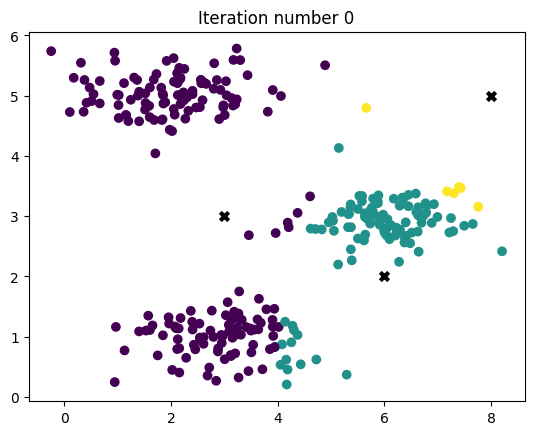

K-Means iteration 1/9


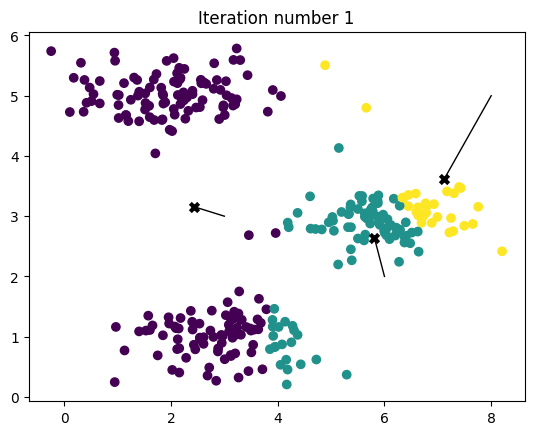

K-Means iteration 2/9


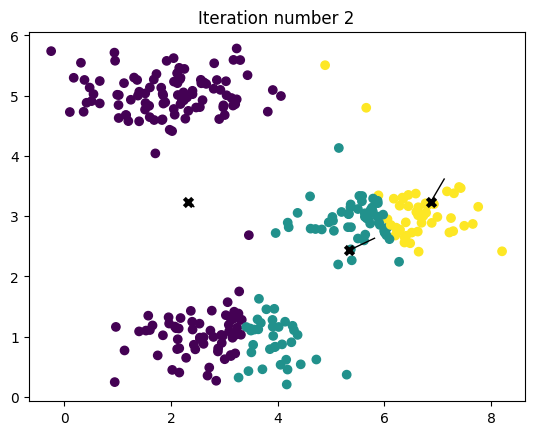

K-Means iteration 3/9


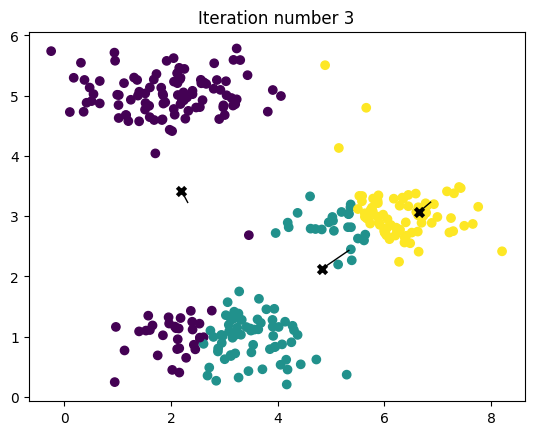

K-Means iteration 4/9


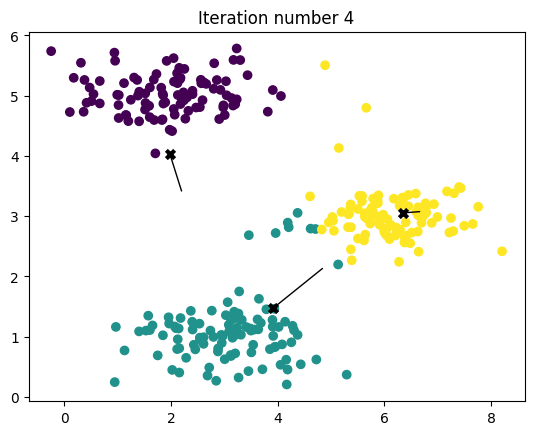

K-Means iteration 5/9


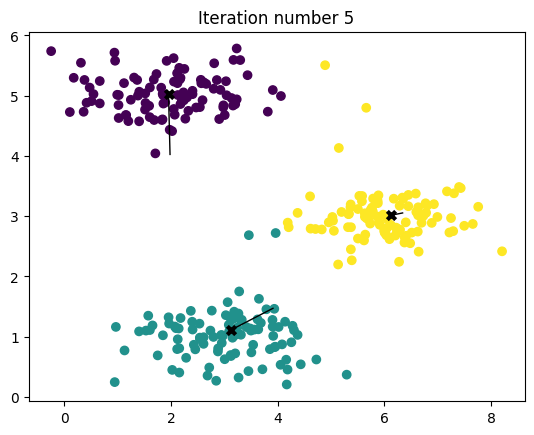

K-Means iteration 6/9


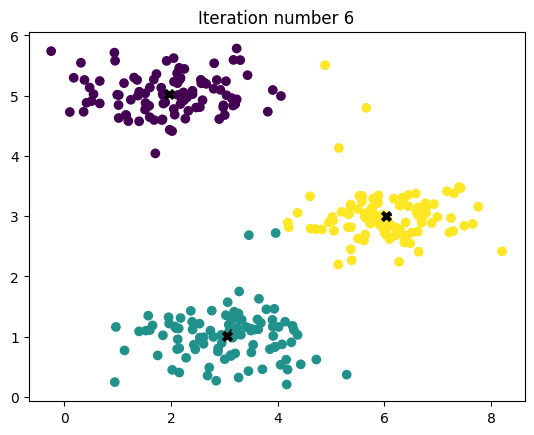

K-Means iteration 7/9


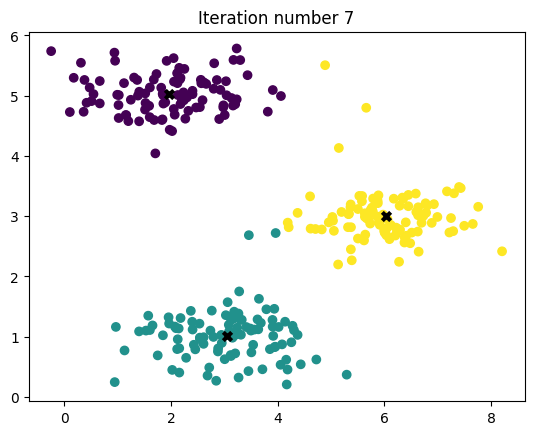

K-Means iteration 8/9


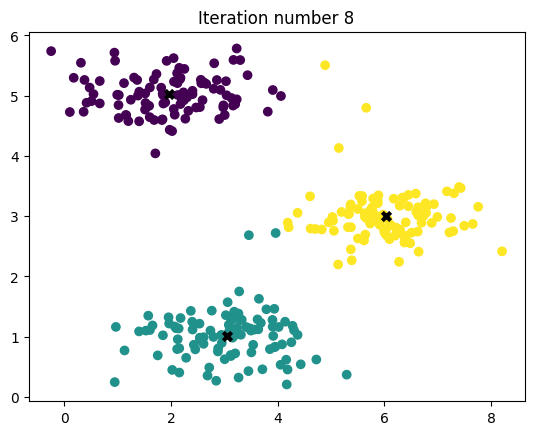

K-Means iteration 9/9


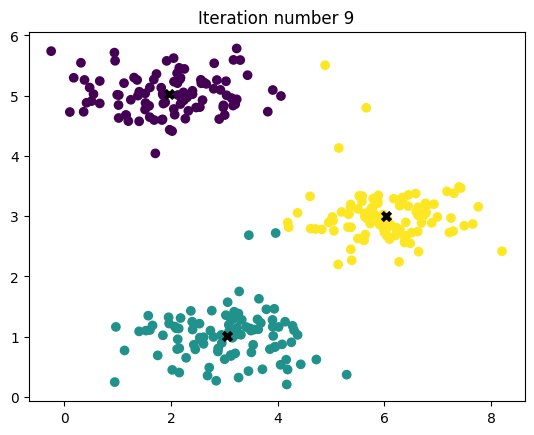

In [ ]:
# Load an example dataset
X = np.load("ex7_X.npy")

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [ ]:

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be
    used in K-Means on the dataset X

    Args:
        X (ndarray): Data points
        K (int):     number of centroids/clusters

    Returns:
        centroids (ndarray): Initialized centroids
    """

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

K-Means iteration 0/9


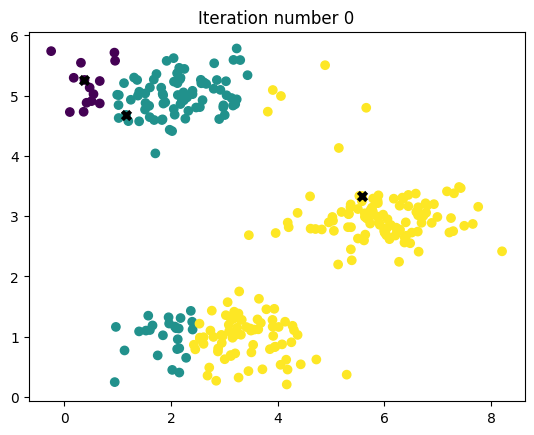

K-Means iteration 1/9


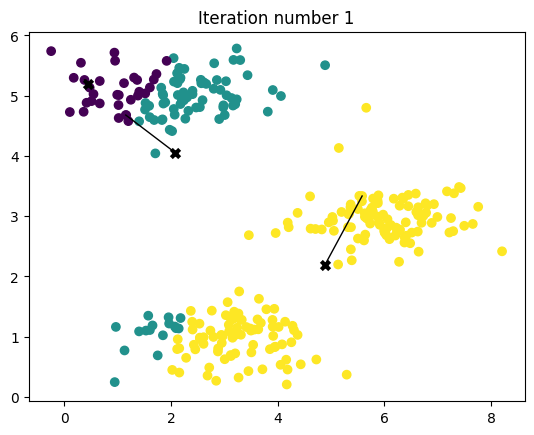

K-Means iteration 2/9


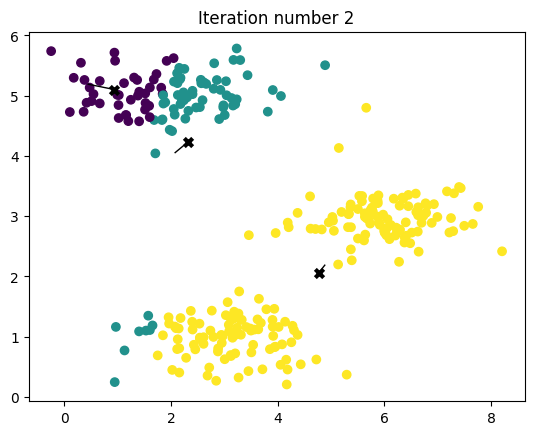

K-Means iteration 3/9


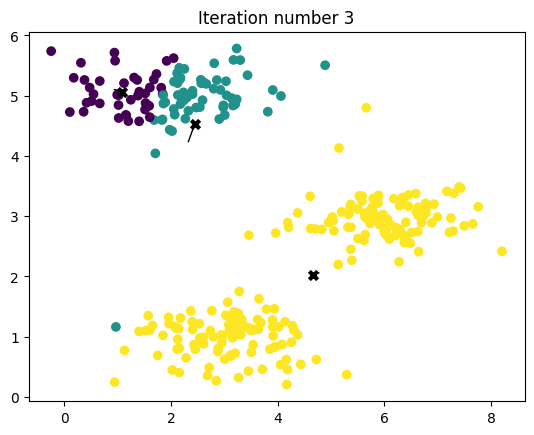

K-Means iteration 4/9


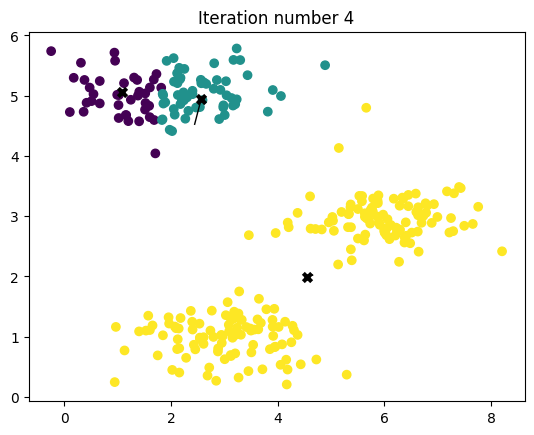

K-Means iteration 5/9


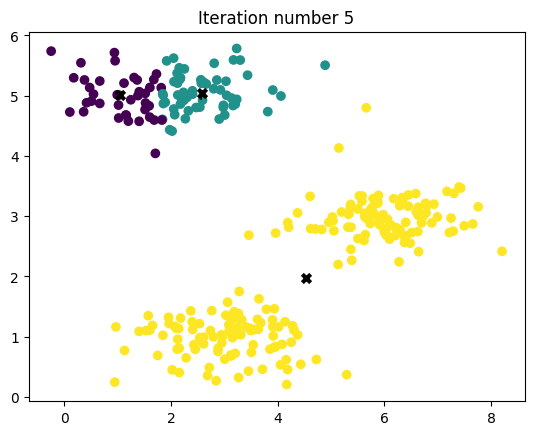

K-Means iteration 6/9


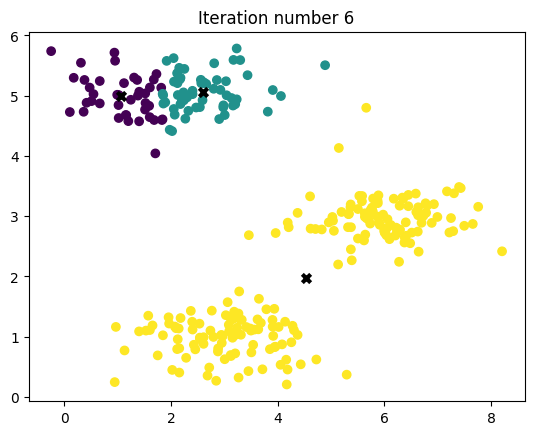

K-Means iteration 7/9


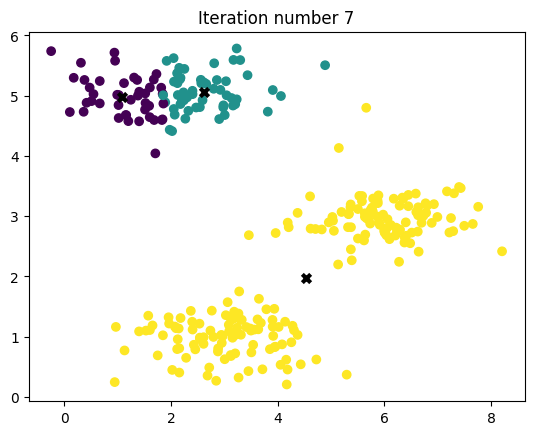

K-Means iteration 8/9


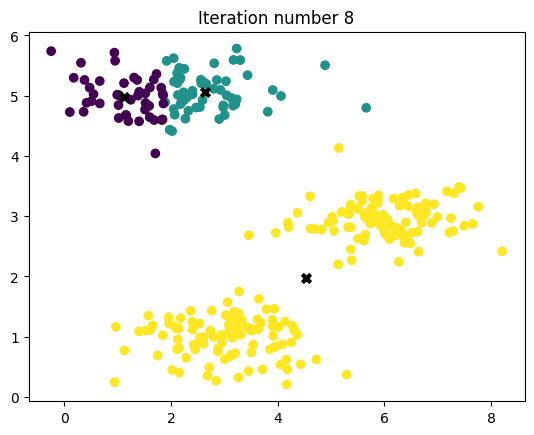

K-Means iteration 9/9


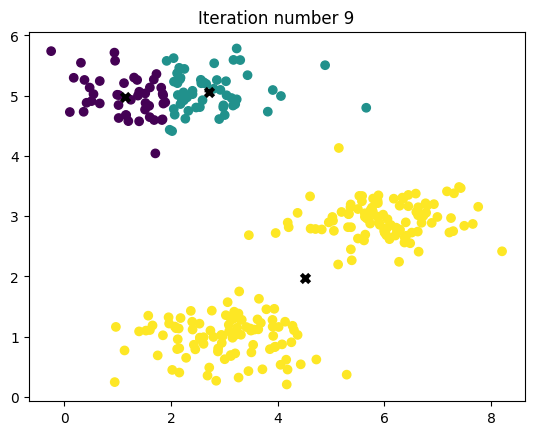

In [ ]:
# Load an example dataset
X = np.load("ex7_X.npy")

K = 3

# Number of iterations
max_iters = 10
initial_centroid=kMeans_init_centroids(X, K)

centroids, idx = run_kMeans(X, initial_centroid, max_iters, plot_progress=True)

In [ ]:
original_img = plt.imread('bird_small.png')

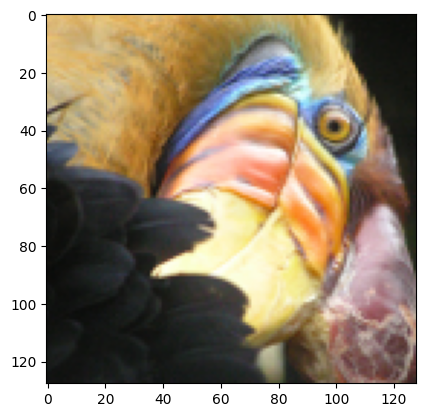

In [ ]:
plt.imshow(original_img)

In [ ]:
print("Shape of og image:",original_img.shape)

Shape of og image: (128, 128, 3)


In [ ]:
original_img=original_img/255


X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1],original_img.shape[2] ))
X_img

array([[0.00336794, 0.00276817, 0.00158401],
       [0.0035371 , 0.00284506, 0.00178393],
       [0.00347559, 0.00286044, 0.00169166],
       ...,
       [0.00099962, 0.00066128, 0.00059977],
       [0.00089196, 0.00056901, 0.00058439],
       [0.00079969, 0.00059977, 0.00052288]], dtype=float32)

In [ ]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16
max_iters = 10

# Using the function you have implemented above.
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [ ]:
print("shape of idx:",idx.shape)
print("First few values:",idx[:15])

shape of idx: (16384,)
First few values: [ 4 11 11  4  4 11 11 11  4  4  4 11  4  4  4]


In [ ]:
# Represent image in terms of indices
X_recovered = centroids[idx, :]

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

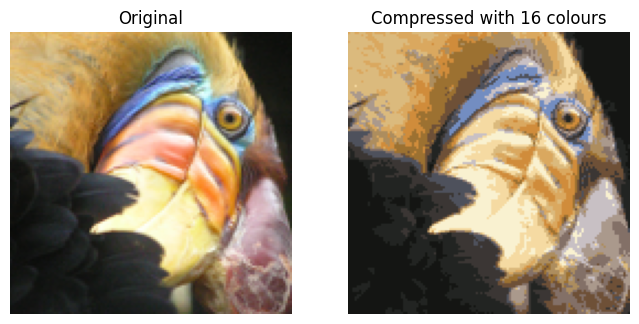

In [ ]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()